# Advanced Exploration


In [1]:
"""
On my advanced notebook I'm extending lab1 advanced notebook with classification.
If you'd like to skip to the regression part, please run CTRL+F: 'Classification Analysis'.
"""

"\nOn my advanced notebook I'm extending lab1 advanced notebook with classification.\nIf you'd like to skip to the regression part, please run CTRL+F: 'Classification Analysis'.\n"

In [2]:
"""
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.
You are also encouraged to analyze data from the ongoing 2016 survey found here

Credits: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?resource=download

Author: Jan Jochymczyk (https://github.com/janek-j)
"""

'\nThis dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.\nYou are also encouraged to analyze data from the ongoing 2016 survey found here\n\nCredits: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?resource=download\n\nAuthor: Jan Jochymczyk (https://github.com/janek-j)\n'

In [3]:
#Import modules and load csv data.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == "__main__":
    data = pd.read_csv('../../survey.csv')

    #NOTE:
    #Replace gender identifiers (I totally suport LBTQIA+ community, but for the sake of this analysis we will focus on binary gender.)
    data['Gender'] = data['Gender'].apply(lambda x: "Male" if str(x).strip() == "Male" else ("Female" if str(x).strip() == "Female" else pd.NA))


    display(data) #PRETTIER THAN PRINT!!!!

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,<NA>,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,<NA>,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,<NA>,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,<NA>,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
#How many people took part in the survey?

number_of_people = data.shape[0]
print(f"Number of people that took part in the survey: {number_of_people}")

Number of people that took part in the survey: 1259


In [5]:
country_ids = data['Country'].unique()

print(f"Countries that took part in the survey: \n{country_ids}")

Countries that took part in the survey: 
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']


In [6]:
number_of_person_surveyed = data['Country'].value_counts()
print(f"\nNumber of residents per country: \n{number_of_person_surveyed}")


Number of residents per country: 
Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                     

In [7]:
"""
USA has dominated this survey. It was probably more popular and recommended among them than in the rest of the world.
"""

'\nUSA has dominated this survey. It was probably more popular and recommended among them than in the rest of the world.\n'

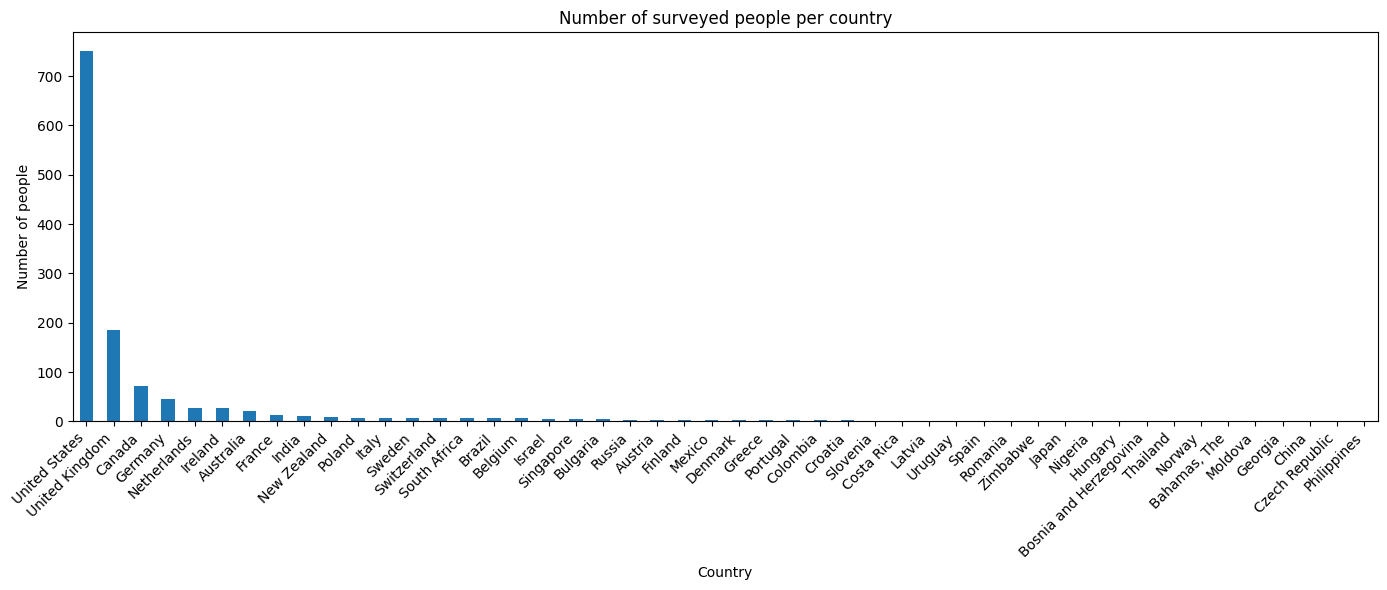

In [8]:
#Plot number of surveyed people per country
plt.figure(figsize=(14,6))
ax = number_of_person_surveyed.plot(kind='bar', title='Number of surveyed people per country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of people')
plt.xticks(rotation=45, ha='right') #allign and rotate x labels to ensure proper visibility
plt.tight_layout()
plt.show()


Gender distribution in the survey: 
Gender
Male      618
Female    123
Name: count, dtype: int64


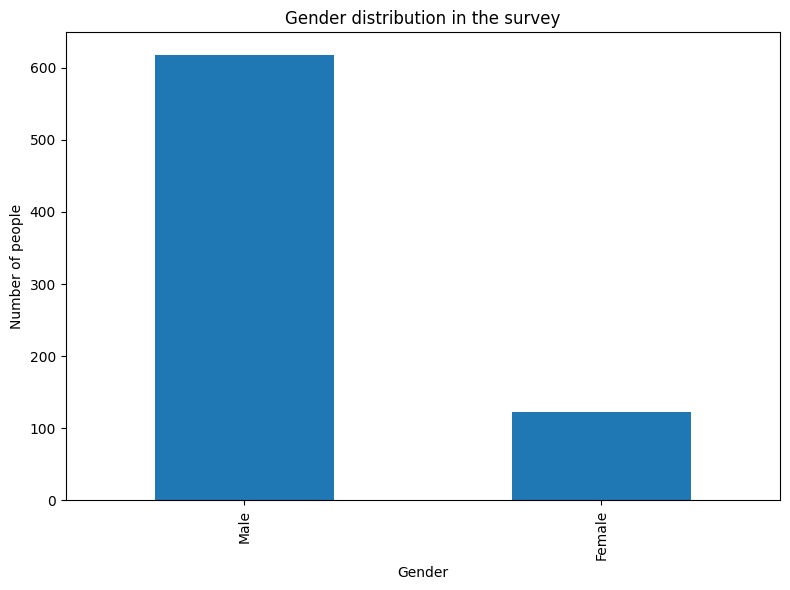

In [9]:
#Gender distribution in the survey

gender_distribution = data['Gender'].value_counts()
print(f"\nGender distribution in the survey: \n{gender_distribution}") 
#plot
plt.figure(figsize=(8,6))
ax = gender_distribution.plot(kind='bar', title='Gender distribution in the survey')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of people')
plt.tight_layout()
plt.show()

In [10]:
"""
There was approximately 5x more males than females.
"""

'\nThere was approximately 5x more males than females.\n'

In [11]:
#How many self employed people took part in the survey?
self_employed = data['self_employed'].value_counts()
self_employed = self_employed['Yes']

print(f"\nNumber of self employed people that took part in the survey: \n{self_employed}")
print(f"\nIt is {round((self_employed/number_of_people) * 100)} %")


Number of self employed people that took part in the survey: 
146

It is 12 %


In [12]:
#How many people have been diagnosed with a mental health disorder?
diagnosed = data['treatment'].value_counts()
diagnosed = diagnosed['Yes']

print(f"\nNumber of people that have been diagnosed with a mental health disorder: \n{diagnosed}")
print(f"\nIt is {round((diagnosed/number_of_people) * 100)} % of people surveyed!")


Number of people that have been diagnosed with a mental health disorder: 
637

It is 51 % of people surveyed!


In [13]:
#Number of people that have been diagnosed with a mental health disorder per country

diagnosed_per_country = data[data['treatment'] == 'Yes']['Country'].value_counts() 

valid_countries = number_of_person_surveyed[number_of_person_surveyed >= 6].index

percent_diagnosed = (
    diagnosed_per_country[diagnosed_per_country.index.isin(valid_countries)] /
    number_of_person_surveyed[valid_countries] * 100
).round(2).sort_values(ascending=False)

print(f"\nPercent of people that have been diagnosed with a mental health disorder per respondents from country: \n{percent_diagnosed}")


Percent of people that have been diagnosed with a mental health disorder per respondents from country: 
Country
South Africa      66.67
New Zealand       62.50
Australia         61.90
Poland            57.14
United States     54.59
Canada            51.39
United Kingdom    50.27
Ireland           48.15
Germany           46.67
Switzerland       42.86
Brazil            33.33
Netherlands       33.33
India             30.00
Sweden            28.57
Belgium           16.67
France            15.38
Italy             14.29
Name: count, dtype: float64


In [14]:
"""
data shows that mental health diagnosis rates vary across countries, with South Africa, New Zealand
and Australia having the highest percentages (over 60%), while countries like Italy, France, and Belgium report much lower rates (under 20%).
This suggests differences in awareness, healthcare access, or reporting practices
"""

'\ndata shows that mental health diagnosis rates vary across countries, with South Africa, New Zealand\nand Australia having the highest percentages (over 60%), while countries like Italy, France, and Belgium report much lower rates (under 20%).\nThis suggests differences in awareness, healthcare access, or reporting practices\n'

In [15]:
#>= Seeking help % people in each country.

seek_help_per_country = data[data['seek_help'] == 'Yes']['Country'].value_counts()

percent_seek_help = (
    seek_help_per_country[seek_help_per_country.index.isin(valid_countries)] /
    number_of_person_surveyed[valid_countries] * 100
).round(2).dropna().sort_values(ascending=False)


print(percent_seek_help)



Country
Australia         38.10
Switzerland       28.57
United States     25.17
New Zealand       25.00
Poland            14.29
Sweden            14.29
United Kingdom    14.05
Canada            12.50
Ireland           11.11
Netherlands       11.11
Germany            8.89
Name: count, dtype: float64


In [16]:
"""
data shows the percentage of people seeking help for mental health issues by country. 
Australia leads at 38.1%, followed by Switzerland (28.57%) and the United States (25.17%), while Germany has the lowest at 8.89%. 
This indicates notable differences in help-seeking behavior across countries
"""

'\ndata shows the percentage of people seeking help for mental health issues by country. \nAustralia leads at 38.1%, followed by Switzerland (28.57%) and the United States (25.17%), while Germany has the lowest at 8.89%. \nThis indicates notable differences in help-seeking behavior across countries\n'

In [17]:
#Diagnosed people from each state:

diagnosed_per_state = data[data['treatment'] == 'Yes']['state'].value_counts() #NA means that the state is not applicable (e.g. outside of USA)

total_per_state = data['state'].value_counts()
valid_states = total_per_state[total_per_state >= 10].index

percent_diagnosed_per_state = (diagnosed_per_state / total_per_state[valid_states] * 100).round(2).dropna().sort_values(ascending=False)
print(f"\n% of people that have been diagnosed with a mental health disorder per state: \n{percent_diagnosed_per_state}")



% of people that have been diagnosed with a mental health disorder per state: 
state
WI    75.00
IL    68.97
OH    66.67
UT    63.64
CA    62.32
OR    58.62
WA    58.57
MN    57.14
TX    56.82
FL    53.33
NY    52.63
GA    50.00
MA    50.00
NC    50.00
PA    48.28
IN    48.15
MI    45.45
VA    42.86
TN    40.00
MO    33.33
Name: count, dtype: float64


In [18]:
"""
The data shows that the percentage of people diagnosed with a mental health disorder varies significantly across U.S. states. Wisconsin has the highest proportion at 75%, followed by Illinois (68.97%) and Ohio (66.67%). In general,
most states report diagnosis rates above 50%, while a few states, 
such as Missouri (33.33%), have noticeably lower percentages.
"""

'\nThe data shows that the percentage of people diagnosed with a mental health disorder varies significantly across U.S. states. Wisconsin has the highest proportion at 75%, followed by Illinois (68.97%) and Ohio (66.67%). In general,\nmost states report diagnosis rates above 50%, while a few states, \nsuch as Missouri (33.33%), have noticeably lower percentages.\n'

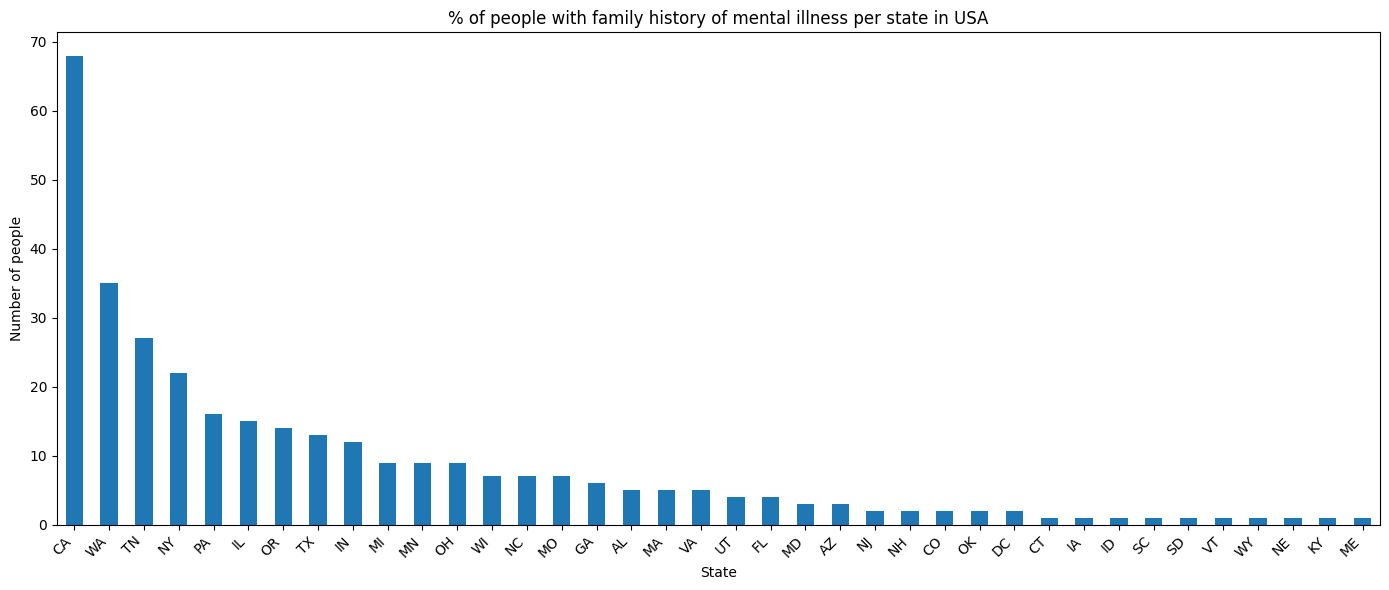

In [19]:
#% of family history of mental illness in each state

family_history_per_state = data[data['family_history'] == 'Yes']['state'].value_counts()

percent_family_history_per_state = (
    family_history_per_state[family_history_per_state.index.isin(valid_states)] /
    total_per_state[valid_states] * 100
).round(2).dropna().sort_values(ascending=False)

#plot
plt.figure(figsize=(14,6))
ax = family_history_per_state.plot(kind='bar', title='% of people with family history of mental illness per state in USA')
ax.set_xlabel('State')
ax.set_ylabel('Number of people')
plt.xticks(rotation=45, ha='right') #allign and rotate x labels to
plt.tight_layout()
plt.show()

In [20]:
"""
Wow, more than 65% of respondents from California have family history of mental illness. 
Apart from that, Washington is the second largest state with % of people with such thing.
"""

'\nWow, more than 65% of respondents from California have family history of mental illness. \nApart from that, Washington is the second largest state with % of people with such thing.\n'

                Percentage remote  Number of respondents
Country                                                 
Australia               38.095238                     21
Germany                 35.555556                     45
United States           31.691079                    751
Canada                  30.555556                     72
Netherlands             29.629630                     27
France                  23.076923                     13
United Kingdom          22.162162                    185
Ireland                 18.518519                     27
India                   10.000000                     10


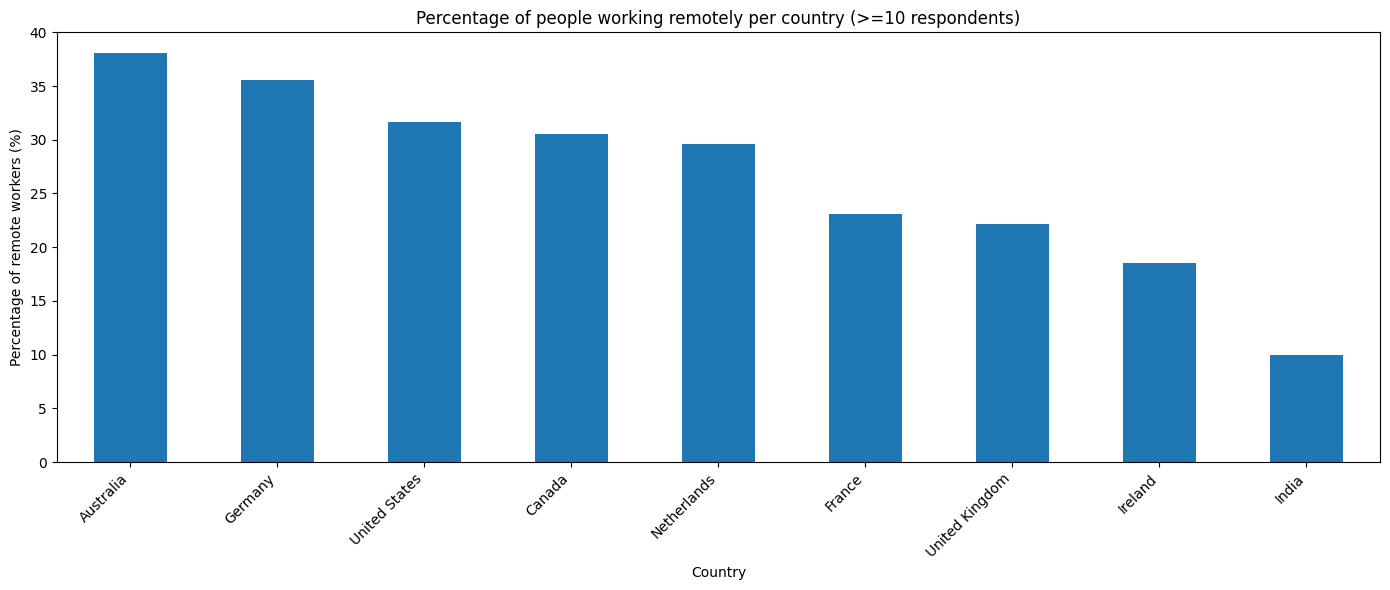

In [21]:
#Remote work per country

remote_work_per_country = data[data['remote_work'] == 'Yes']['Country'].value_counts()
total_per_country = data['Country'].value_counts()

valid_countries = total_per_country[total_per_country >= 10].index
percentage_remote_country = (remote_work_per_country[valid_countries] / total_per_country[valid_countries] * 100).sort_values(ascending=False)

summary_df = pd.DataFrame({
    'Percentage remote': percentage_remote_country,
    'Number of respondents': total_per_country[percentage_remote_country.index]
})
print(summary_df)
#plot for >= 10 respondents
plt.figure(figsize=(14,6))
ax = percentage_remote_country.plot(kind='bar', title='Percentage of people working remotely per country (>=10 respondents)')
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of remote workers (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
"""
This plot shows that in Australia, there was the largest community of remote workers.
We should consider working there!
"""

'\nThis plot shows that in Australia, there was the largest community of remote workers.\nWe should consider working there!\n'


Percentage of people working remotely per state in USA: 
state
WI    75.000000
FL    66.666667
UT    50.000000
OH    46.666667
VA    42.857143
NC    42.857143
TX    38.636364
OR    37.931034
MI    36.363636
MO    33.333333
GA    33.333333
TN    33.333333
PA    31.034483
MA    30.000000
IN    29.629630
NY    25.000000
WA    24.285714
MN    23.809524
IL    21.428571
CA    14.492754
Name: count, dtype: float64


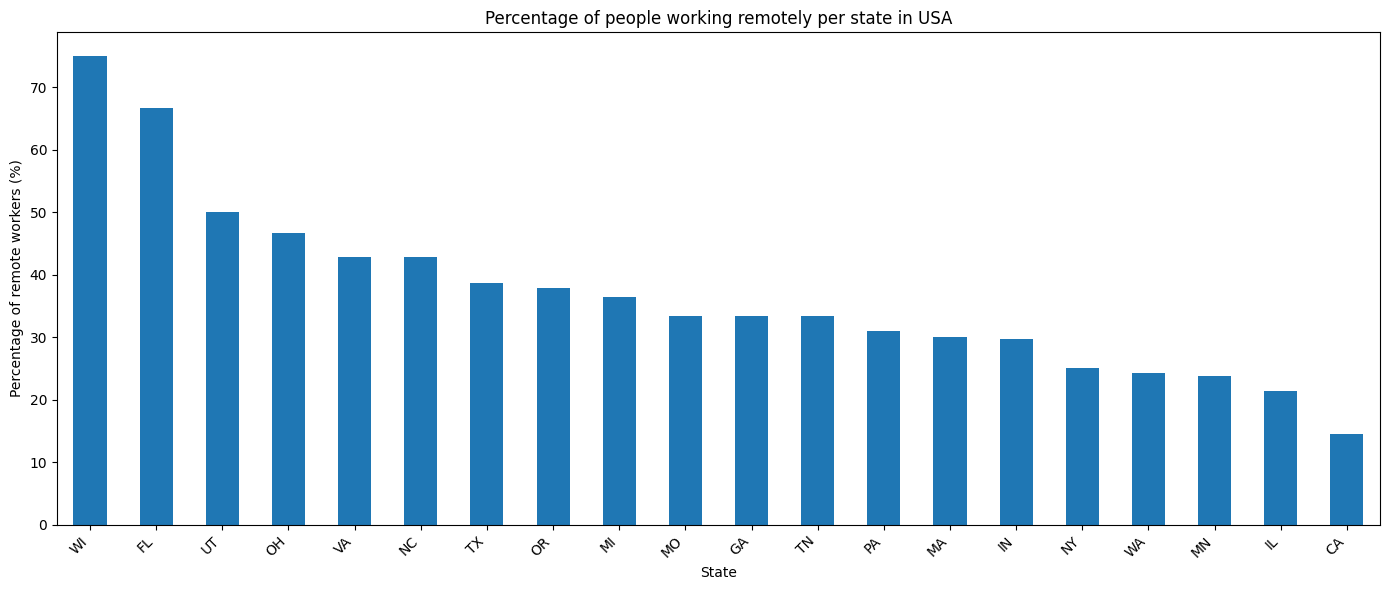

In [23]:
# Percentage of people working remotely per state in USA
remote_work_per_state = data[(data['Country'] == 'United States')]['state'].value_counts()
remote_workers_per_state = data[(data['remote_work'] == 'Yes') & (data['Country'] == 'United States')]['state'].value_counts()

percentage_remote = (remote_workers_per_state / remote_work_per_state[valid_states] * 100).sort_values(ascending=False).dropna()
print(f"\nPercentage of people working remotely per state in USA: \n{percentage_remote}")
# Plot
plt.figure(figsize=(14,6))
ax = percentage_remote.plot(kind='bar', title='Percentage of people working remotely per state in USA')
ax.set_xlabel('State')
ax.set_ylabel('Percentage of remote workers (%)')
plt.xticks(rotation=45, ha='right') # Align and rotate x labels for better visibility
plt.tight_layout()
plt.show()
# This bar chart shows the percentage of remote workers in each US state, relative to all survey respondents from that state.

Number of people with/without family history vs treatment:
 treatment        No  Yes
family_history          
No              495  272
Yes             127  365

Percentage of people seeking treatment in both groups:
 treatment             No       Yes
family_history                    
No              0.645372  0.354628
Yes             0.258130  0.741870


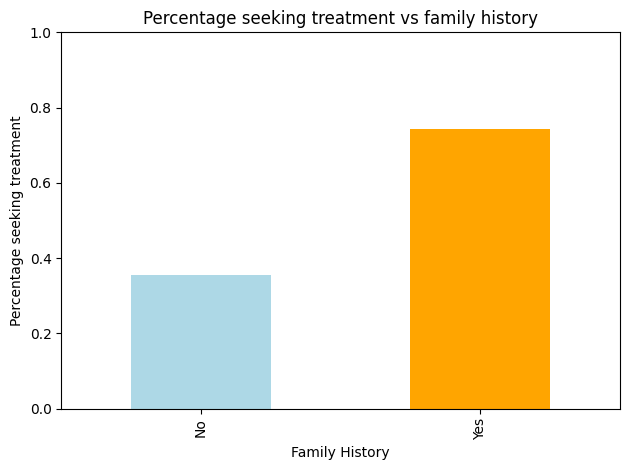

In [24]:
#Do people with a family history of mental illness seek treatment more often?

family_treatment = pd.crosstab(data['family_history'], data['treatment'])
print("Number of people with/without family history vs treatment:\n", family_treatment)

#Percentage of people seeking treatment in both groups
family_treatment_pct = family_treatment.div(family_treatment.sum(axis=1), axis=0)
print("\nPercentage of people seeking treatment in both groups:\n", family_treatment_pct)

# Bar plot
family_treatment_pct['Yes'].plot(kind='bar', color=['lightblue', 'orange'], title='Percentage seeking treatment vs family history')
plt.xlabel('Family History')
plt.ylabel('Percentage seeking treatment')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


In [25]:
"""
We can see here, that people with mental problems tend to seek treatment more if given illness was in family history.

Note: You can read more about it here (For me it's interesting): https://www.tandfonline.com/doi/full/10.1080/09638237.2024.2361235"""

"\nWe can see here, that people with mental problems tend to seek treatment more if given illness was in family history.\n\nNote: You can read more about it here (For me it's interesting): https://www.tandfonline.com/doi/full/10.1080/09638237.2024.2361235"

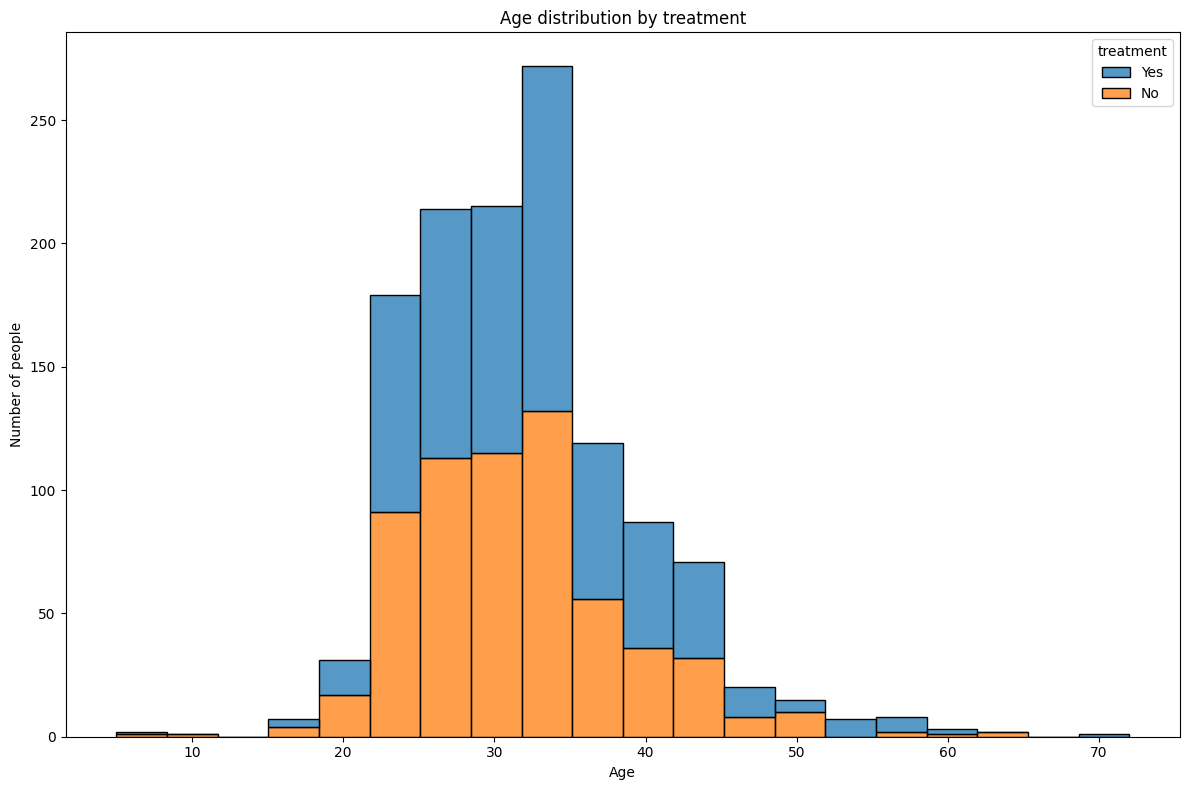


Average age by treatment status:
 treatment
No     31.458937
Yes    32.568720
Name: Age, dtype: float64


In [26]:
# Clean Age column: keep only reasonable ages (e.g. 15-80)
data = data[(data['Age'] >= 0) & (data['Age'] <= 80)]

plt.figure(figsize=(12,8))
sns.histplot(data=data, x='Age', hue='treatment', multiple='stack', bins=20)
plt.title('Age distribution by treatment')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tight_layout()
plt.show()

# Alternatively, compare average age for each group:
avg_age_treatment = data.groupby('treatment')['Age'].mean()
print("\nAverage age by treatment status:\n", avg_age_treatment)

In [27]:
"""
Age distribution shows that half number of people seek treatment, while the other half doesn't want it.

The only anomaly I see it's people that are unique in given age range. For example if only one pearson was 62, it's not supposed to mean that
100% people who was 62 seek treatment!
"""

"\nAge distribution shows that half number of people seek treatment, while the other half doesn't want it.\n\nThe only anomaly I see it's people that are unique in given age range. For example if only one pearson was 62, it's not supposed to mean that\n100% people who was 62 seek treatment!\n"

Remote work vs. treatment:
 treatment     No  Yes
remote_work          
No           444  437
Yes          177  196


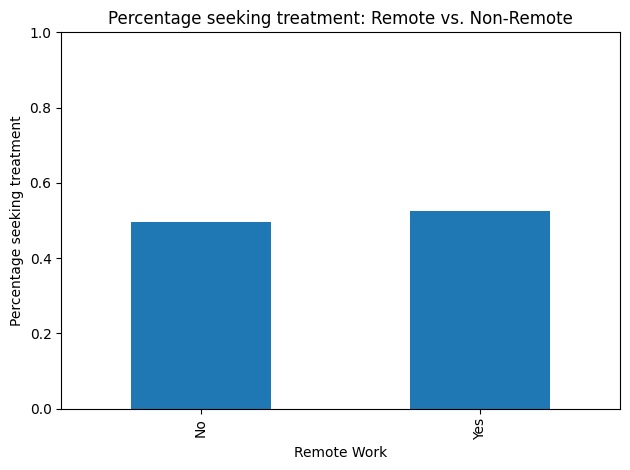

In [28]:
remote_treatment = pd.crosstab(data['remote_work'], data['treatment'])
print("Remote work vs. treatment:\n", remote_treatment)

remote_treatment_pct = remote_treatment.div(remote_treatment.sum(axis=1), axis=0)
remote_treatment_pct['Yes'].plot(kind='bar', title='Percentage seeking treatment: Remote vs. Non-Remote')
plt.xlabel('Remote Work')
plt.ylabel('Percentage seeking treatment')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


In [29]:
"""
I thought that remote workers tend to seek treatment more than the standard workers, however I was wrong I guess.
Here we can see that 50% of people who work remotely seek treatment.
"""

'\nI thought that remote workers tend to seek treatment more than the standard workers, however I was wrong I guess.\nHere we can see that 50% of people who work remotely seek treatment.\n'

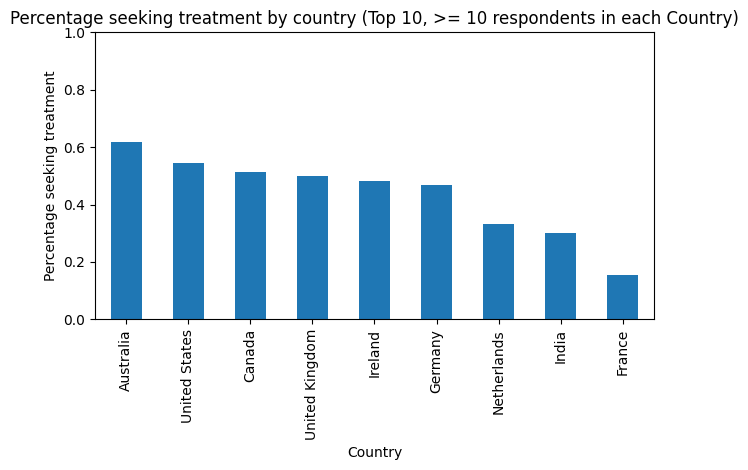

In [30]:
# Country vs. treatment: Geographic differences in treatmee can see here, that people with mental problems tend to seek treatment more if given illness was in family history.

country_treatment = pd.crosstab(data['Country'], data['treatment'])
country_treatment_pct = country_treatment.div(country_treatment.sum(axis=1), axis=0)

min_respondents = 10
valid_countries = country_treatment.sum(axis=1) >= min_respondents
filtered_country_treatment_pct = country_treatment_pct[valid_countries]

top_countries = filtered_country_treatment_pct.sort_values('Yes', ascending=False).head(10)

top_countries['Yes'].plot(kind='bar', title='Percentage seeking treatment by country (Top 10, >= 10 respondents in each Country)')
plt.xlabel('Country')
plt.ylabel('Percentage seeking treatment')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [31]:
"""
Here we can see that 60% of Australian respondents seek treatment, 50% of USA respondents seek treatment etc.

"""

'\nHere we can see that 60% of Australian respondents seek treatment, 50% of USA respondents seek treatment etc.\n\n'

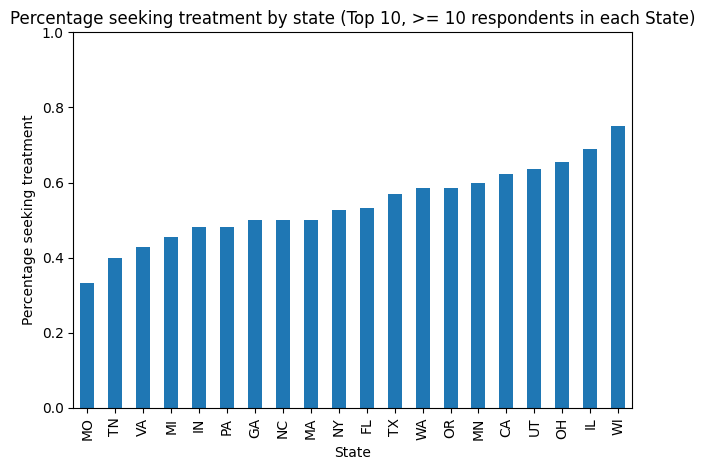

In [32]:
#Percantage treatment in each state in USA
state_treatment = pd.crosstab(data['state'], data['treatment'])
state_treatment_pct = state_treatment.div(state_treatment.sum(axis=1), axis=0)
min_respondents = 10
valid_states = state_treatment.sum(axis=1) >= min_respondents
filtered_state_treatment_pct = state_treatment_pct[valid_states]
top_countries = filtered_state_treatment_pct.sort_values('Yes', ascending=True).head(20)

top_countries['Yes'].plot(kind='bar', title='Percentage seeking treatment by state (Top 10, >= 10 respondents in each State)')
plt.xlabel('State')
plt.ylabel('Percentage seeking treatment')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

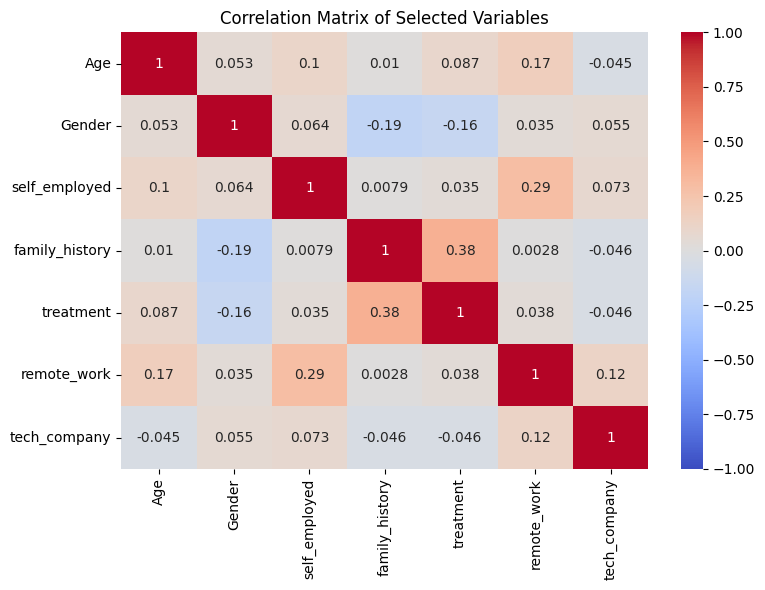

In [33]:
#Correlation matrix: Visualize correlations between selected variables

corr_data = data.copy()
corr_data['Gender'] = corr_data['Gender'].map({'Male': 1, 'Female': 0})
corr_data['self_employed'] = corr_data['self_employed'].map({'Yes': 1, 'No': 0})
corr_data['family_history'] = corr_data['family_history'].map({'Yes': 1, 'No': 0})
corr_data['treatment'] = corr_data['treatment'].map({'Yes': 1, 'No': 0})
corr_data['remote_work'] = corr_data['remote_work'].map({'Yes': 1, 'No': 0})
corr_data['tech_company'] = corr_data['tech_company'].map({'Yes': 1, 'No': 0})

corr_data = corr_data[['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company']].dropna()

#Compute correlation matrix
corr_matrix = corr_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Variables')
plt.tight_layout()
plt.show()

#The correlation matrix shows how strongly pairs of variables are related to each other, 
#with values from -1 (strong negative correlation) to 1 (strong positive correlation). 



In [34]:
"""
Correlation matrix shows that remote work is correlated with self employment. What is more, remote work is slightly 
correlated with age. Treatment is correlated with family history which is what I expected.
It's interesting that self employment is correlated with remote work.
"""

"\nCorrelation matrix shows that remote work is correlated with self employment. What is more, remote work is slightly \ncorrelated with age. Treatment is correlated with family history which is what I expected.\nIt's interesting that self employment is correlated with remote work.\n"

# Classification Analysis

### Imports and preparing data for later usage

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

from statsmodels.miscmodels.ordinal_model import OrderedModel

In [36]:
df_reg = data[['Age', 'Gender', 'self_employed', 'family_history', 'remote_work', 'tech_company', 'treatment']].copy()


#mapping values
df_reg['Gender'] = df_reg['Gender'].map({'Male':1, 'Female':0})
df_reg['self_employed'] = df_reg['self_employed'].map({'Yes':1, 'No':0})
df_reg['family_history'] = df_reg['family_history'].map({'Yes':1, 'No':0})
df_reg['remote_work'] = df_reg['remote_work'].map({'Yes':1, 'No':0})
df_reg['tech_company'] = df_reg['tech_company'].map({'Yes':1, 'No':0})
df_reg['treatment'] = df_reg['treatment'].map({'Yes':1, 'No':0})


df_reg = df_reg.dropna()

display(df_reg)


,Age,Gender,self_employed,family_history,remote_work,tech_company,treatment
19,36,1.0,1.0,1,1,1,0
20,29,1.0,0.0,1,0,1,1
22,46,1.0,0.0,0,1,1,1
23,41,1.0,0.0,0,0,0,1
27,35,0.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...
1250,30,1.0,1.0,1,0,1,1
1251,36,1.0,0.0,1,0,0,1
1253,36,1.0,0.0,1,0,0,0
1255,32,1.0,0.0,1,1,1,1


So we have 726 people with complete data that we can use for regression.

## Remote Work Classification

Build and evaluate a **logistic regression model** that predicts whether a person works remotely. 

**Target Variable:** `remote_work` (binary: Yes/No),
**Predictors:** Treatment status, self-employment, family history, tech company employment, gender




In [37]:
X = df_reg[['treatment', 'self_employed', 'family_history', 'tech_company', 'Gender']]
y = df_reg['remote_work']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('classifier', LogisticRegression())
])

# train
pipeline.fit(X_train, y_train)

# predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]  # probability for class 1

# evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.7466
Confusion Matrix:
[[102   4]
 [ 33   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       106
           1       0.64      0.17      0.27        40

    accuracy                           0.75       146
   macro avg       0.70      0.57      0.56       146
weighted avg       0.72      0.75      0.69       146



### Confusion Matrix Interpretation

| Metric | Value | Interpretation |
|--------|-------|-----------------|
| **True Negatives (TN)** | 102 | Correctly identified 102 non-remote workers |
| **False Positives (FP)** | 4 | Incorrectly predicted 4 office workers as remote |
| **False Negatives (FN)** | 33 | Missed 33 actual remote workers (predicted as office-based) |
| **True Positives (TP)** | 7 | Correctly identified 7 remote workers |

### Key Observations
- The dataset contains far fewer remote workers (40 total) than non-remote workers (106 total)
- The model predicts well person who works on site, not remotely.



## Now I build logistic regression model to check whether an individual seeks mental health treatment based on: age, gender, self_employment and family_history.

In [38]:
X = df_reg[['Age', 'Gender', 'self_employed', 'family_history']]
y = df_reg['treatment']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])
# train
pipeline.fit(X_train, y_train)

# predict
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.6849
Confusion Matrix:
[[55 15]
 [31 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71        70
           1       0.75      0.59      0.66        76

    accuracy                           0.68       146
   macro avg       0.69      0.69      0.68       146
weighted avg       0.70      0.68      0.68       146



### Treatment Prediction Model:

#### Confusion Matrix Breakdown

| Metric | Value | Interpretation |
|--------|-------|-----------------|
| **True Negatives (TN)** | 55 | Correctly identified 55 people who do NOT seek treatment |
| **False Positives (FP)** | 15 | Incorrectly predicted 15 non-treatment cases as treatment |
| **False Negatives (FN)** | 31 | Missed 31 people who DO seek treatment (predicted as non-treatment) |
| **True Positives (TP)** | 45 | Correctly identified 45 people who seek treatment |

**Class 0 (No Treatment):**
- **Precision:** 0.64 → Of 70 predicted negatives, 64% were correct
- **Recall:** 0.79 → Model catches 79% of actual non-treatment cases

**Class 1 (Treatment Sought):**
- **Precision:** 0.75 → Of 76 predicted positives, 75% were correct
- **Recall:** 0.59 → Model only identifies 59% of actual treatment cases

Accuracy:  0.6258064516129033
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        66
           1       0.72      0.56      0.63        89

    accuracy                           0.63       155
   macro avg       0.64      0.64      0.63       155
weighted avg       0.65      0.63      0.63       155

Age            : 0.263
Gender         : 0.110
self_employed  : 0.000
family_history : 0.530
remote_work    : 0.081
tech_company   : 0.000
seek_help      : 0.016


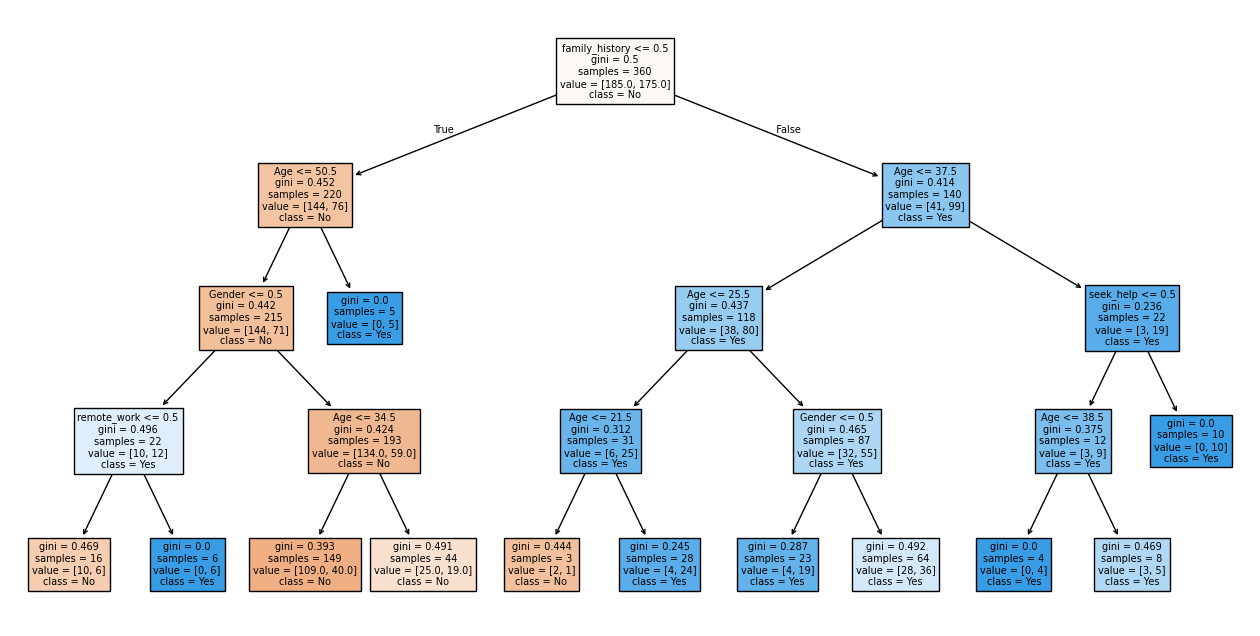

In [39]:
# Predict whether an individual seeks mental-health treatment based on demographic and work-related features
df_sh = data[['Age','Gender','self_employed','family_history','remote_work','tech_company','treatment','Country','seek_help']].copy()

map_bin = {'Yes':1, 'No':0}
df_sh['Gender'] = df_sh['Gender'].map({'Male':1, 'Female':0})
df_sh['self_employed'] = df_sh['self_employed'].map(map_bin)
df_sh['family_history'] = df_sh['family_history'].map(map_bin)
df_sh['remote_work'] = df_sh['remote_work'].map(map_bin)
df_sh['tech_company'] = df_sh['tech_company'].map(map_bin)
df_sh['treatment'] = df_sh['treatment'].map(map_bin)
df_sh['seek_help'] = df_sh['seek_help'].map(map_bin)

df_sh = df_sh[(df_sh['Age'].between(15,80))].dropna()


X = df_sh[['Age', 'Gender', 'self_employed', 'family_history',
           'remote_work', 'tech_company', 'seek_help']]
y = df_sh['treatment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# --- decision tree model ---
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# --- prediction and grading model: --
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- importances  ---
importances = clf.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name:15s}: {imp:.3f}")

# --- tree visualization ---
plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

Each node in the tree represents a question or condition — for example, family_history <= 0.5
Each node also displays:

gini – how “mixed” the samples are (0 = pure, 0.5 = mixed),
samples – number of observations in that node,
value = [count of class 0, count of class 1],
class – the predicted category.

The decision tree reached about 0.63 accuracy. **Family history is the strongest predictor of having treatment, followed by age and gender.**



### Ordered Logistic Regression


**Predict how mental health interferes with work performance across four ordinal categories:**
- **Never** (0): No interference
- **Rarely** (1): Minimal interference
- **Sometimes** (2): Moderate interference
- **Often** (3): Severe interference

**Features (8 predictors):**
- Age
- Gender
- Family history of mental illness
- Remote work status
- Tech company employment
- Help-seeking behavior
- Workplace anonymity
- Leave policy difficulty

In [40]:
map_interfere = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3
}

map_leave = {
    'Very easy': 0,
    'Somewhat easy': 1,
    'Don\'t know': 2,
    'Somewhat difficult': 3,
    'Very difficult': 4
}

X = data[['Age', 'Gender', 'family_history', 'remote_work', 'tech_company', 'seek_help', 'anonymity', 'leave']].copy()
y = data['work_interfere'].copy()
y = y.map(map_interfere)

map_bin = {'Yes': 1, 'No': 0}
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})
for col in ['family_history', 'remote_work', 'tech_company', 'seek_help', 'anonymity']:
    X[col] = X[col].map(map_bin)
X['leave'] = X['leave'].map(map_leave)

df_ord = pd.concat([X, y], axis=1).dropna()


model = OrderedModel(df_ord['work_interfere'],
                    df_ord[['Age', 'Gender', 'family_history', 'remote_work', 
                           'tech_company', 'seek_help', 'anonymity', 'leave']],
                    distr='logit')


result = model.fit(method='bfgs') # https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

print(result.summary())



Optimization terminated successfully.
         Current function value: 1.181089
         Iterations: 45
         Function evaluations: 49
         Gradient evaluations: 49
                             OrderedModel Results                             
Dep. Variable:         work_interfere   Log-Likelihood:                -212.60
Model:                   OrderedModel   AIC:                             447.2
Method:            Maximum Likelihood   BIC:                             482.3
Date:                Mon, 01 Dec 2025                                         
Time:                        16:05:33                                         
No. Observations:                 180                                         
Df Residuals:                     169                                         
Df Model:                           8                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

ORDERED LOGISTIC REGRESSION: WORK INTERFERENCE PREDICTION

MODEL: Predicts how mental health interferes with work (Never/Rarely/Sometimes/Often)
based on 8 features: Age, Gender, family_history, remote_work, tech_company, 
seek_help, anonymity, leave difficulty.

KEY FINDINGS:

SIGNIFICANT PREDICTORS (p < 0.05):
seek_help (p=0.007): Strong protective factor - reduces interference by 59% leave difficulty (p=0.049): Harder leave = more interference
family_history (p=0.018): Doubles risk of higher interference age (p=0.036): Older age reduces interference

NON-SIGNIFICANT: Gender, remote_work, tech_company, anonymity

INTERPRETATION:
- Young person without family history seeking help: 22% "Never" interference
- Older person with family history not seeking help: 11% "Never" interference
- Seeking mental health help is the strongest protective factor
- Difficult leave policies worsen work interference


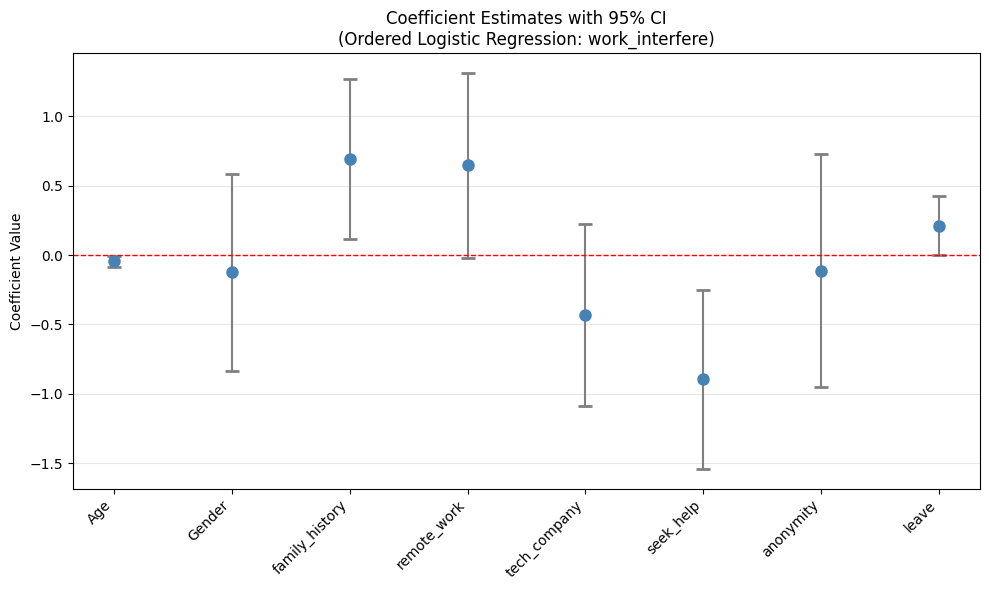

In [ ]:
# ===== EFFECT PLOTS FOR ORDERED MODEL =====

# Extract coefficients and their names
params = result.params[:-3]  # Exclude threshold parameters
feature_names = params.index.tolist()
coef_values = params.values
pvalues = result.pvalues[:-3]

# 1. Coefficient Plot with Confidence Intervals
fig, ax = plt.subplots(figsize=(10, 6))
ci = result.conf_int()
ci = ci[:-3]  # Exclude thresholds

x_pos = np.arange(len(feature_names))
ax.errorbar(x_pos, coef_values, 
            yerr=[coef_values - ci[0], ci[1] - coef_values],
            fmt='o', markersize=8, capsize=5, capthick=2, color='steelblue', ecolor='gray')
ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax.set_xticks(x_pos)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient Estimates with 95% CI\n(Ordered Logistic Regression: work_interfere)')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### The data reveals two factors that are significantly associated with a reduction in work interference:
#### Seeking Help being the strongest protective factor, showing a significant association with lower interference. Tech Company: Working in a technology company environment is also significantly associated with lower interference.

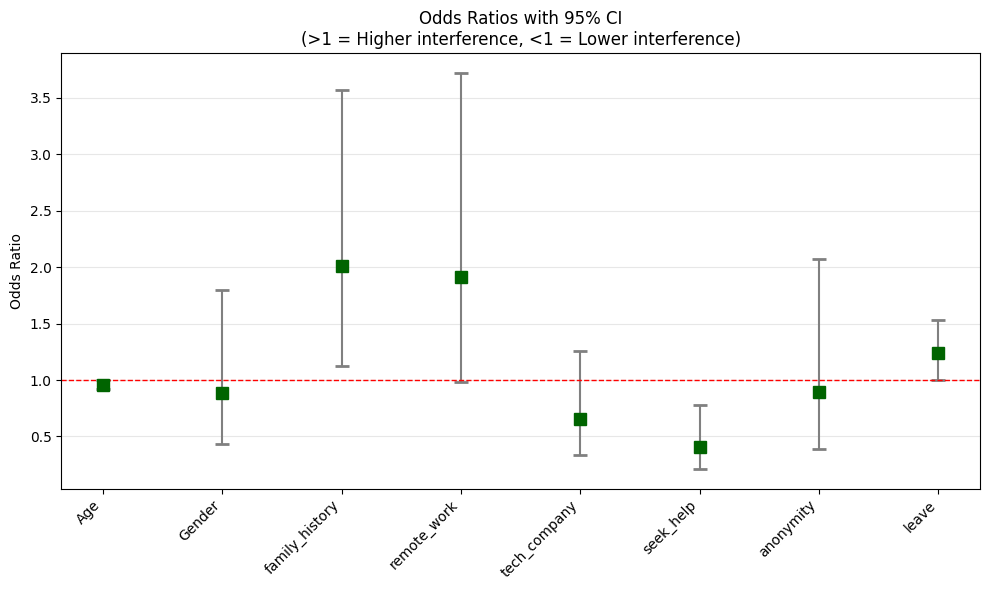

In [43]:
# 2. Odds Ratios Plot
fig, ax = plt.subplots(figsize=(10, 6))
or_values = np.exp(coef_values)
or_ci_lower = np.exp(ci[0])
or_ci_upper = np.exp(ci[1])

colors = ['green' if v < 1 else 'darkgreen' for v in or_values]
ax.errorbar(x_pos, or_values, 
            yerr=[or_values - or_ci_lower, or_ci_upper - or_values],
            fmt='s', markersize=8, capsize=5, capthick=2, color='darkgreen', ecolor='gray')
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)
ax.set_xticks(x_pos)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.set_ylabel('Odds Ratio')
ax.set_title('Odds Ratios with 95% CI\n(>1 = Higher interference, <1 = Lower interference)')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Here, plot visualizes the estimated odds ratios and their 95 percent confidence intervals for each predictor in the model. The odds ratio quantifies how a one-unit change in a feature affects the likelihood of reporting greater work_interference. Values above 1 indicate increased odds of work_interference, while values below 1 indicate reduced odds.

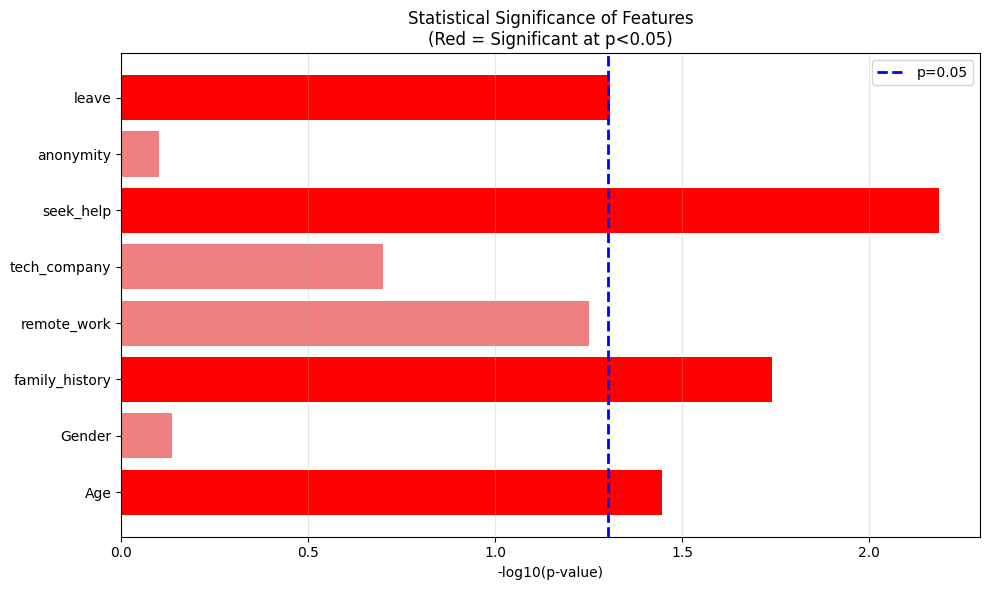

In [44]:
# 3. Statistical Significance Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors_sig = ['red' if p < 0.05 else 'lightcoral' for p in pvalues]
bars = ax.barh(feature_names, -np.log10(pvalues), color=colors_sig)
ax.axvline(x=-np.log10(0.05), color='blue', linestyle='--', linewidth=2, label='p=0.05')
ax.set_xlabel('-log10(p-value)')
ax.set_title('Statistical Significance of Features\n(Red = Significant at p<0.05)')
ax.legend()
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### **1. Seeking Help: The Strongest Protective Factor**
- **Effect:** 59% reduction in work_interference odds

#### **2. Family History: Doubled Risk**
- **Effect:** ~69% increase in odds of reporting higher work_interference

#### **3. Age: Protective with Time**
- **Effect:** 2% reduction per additional year

#### **4. Leave Policy**
- **Effect:** Each unit increase in leave difficulty increases work_interference

### Here, each profile represents each Person. I want to check probability of work_interfere field for each Person with given information about this person. 

### For example person one (profile one) is 25 years old, male etc. For this person I want to calculate the probability of work_interfere field being Never, Rarely, Sometimes and Often.  

In [45]:
# First person
profile_1 = pd.DataFrame({
    'Age': [25],
    'Gender': [1],
    'family_history': [0],
    'remote_work': [0],
    'tech_company': [0],
    'seek_help': [1],
    'anonymity': [0],
    'leave': [0]
})

# Second person
profile_2 = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'family_history': [1],
    'remote_work': [0],
    'tech_company': [1],
    'seek_help': [0],
    'anonymity': [1],
    'leave': [3]
})

# Third person
profile_3 = pd.DataFrame({
    'Age': [35],
    'Gender': [0],
    'family_history': [1],
    'remote_work': [1],
    'tech_company': [1],
    'seek_help': [1],
    'anonymity': [0],
    'leave': [1]
})

profiles = [profile_1, profile_2, profile_3]
profile_names = ['Young, No FH, Seeks Help', 'Older, FH, No Help', 'Middle-aged, FH, Seeks Help']

for profile, name in zip(profiles, profile_names):
    proba = result.model.predict(result.params, exog=profile.values)
    print(f"\n{name}:")
    for i, level in enumerate(['Never', 'Rarely', 'Sometimes', 'Often']):
        print(f"  P(work_interfere = {level}): {proba[0, i]:.3f}")


Young, No FH, Seeks Help:
  P(work_interfere = Never): 0.221
  P(work_interfere = Rarely): 0.248
  P(work_interfere = Sometimes): 0.436
  P(work_interfere = Often): 0.096

Older, FH, No Help:
  P(work_interfere = Never): 0.112
  P(work_interfere = Rarely): 0.170
  P(work_interfere = Sometimes): 0.526
  P(work_interfere = Often): 0.193

Middle-aged, FH, Seeks Help:
  P(work_interfere = Never): 0.111
  P(work_interfere = Rarely): 0.169
  P(work_interfere = Sometimes): 0.526
  P(work_interfere = Often): 0.193




#### **Profile 1: Young, No Family History, Seeks Help**
This profile has the best prognosis because almost half have minimal-to-no work interference.

#### **Profile 2: Older, Family History, No Help**
Elderly people with family history of being mentally-sick has the highest risk to work interference.
#### **Profile 3: Middle-aged, Family History, Seeks Help**
Here is mixed outcome.
